In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import pg8000
from flask import Flask
from functools import reduce

In [2]:
import numpy as np
import pandas as pd
import pprint


In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
first_date = session.query(Measurement.date).order_by(Measurement.date).first()
first_date

('2010-01-01')

In [12]:
#Find last date in measurement table
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [13]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [14]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
measurement_read = pd.read_sql(session.query(Measurement).statement,session.bind)
#measurement_read.head()

measurement_df = pd.DataFrame(measurement_read, columns = ['id','station','date','prcp','tobs']).fillna(0)
measurement_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,0.00,73.0


# Exploratory Climate Analysis

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
prev_yr_precipdf = pd.read_sql(session.query(Measurement.date, Measurement.prcp).\
                               filter(Measurement.date.between('2016-08-23','2017-08-23')).statement,session.bind)

# Calculate the date 1 year ago from the last data point in the database
#(See above)

# Perform a query to retrieve the data and precipitation scores

prev_yr_precipdf.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [17]:
precip_df = pd.DataFrame(prev_yr_precipdf, 
                         columns = ['date','prcp']).fillna(0).sort_values(by='date')
precip_df['date'] = pd.to_datetime(precip_df['date'])

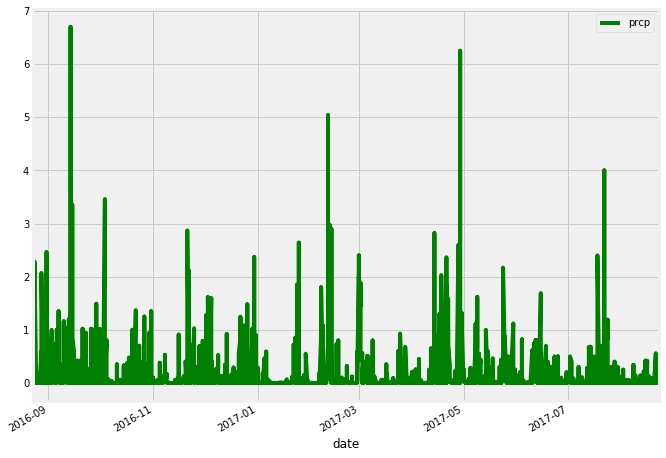

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data

precip_df.plot('date','prcp',figsize=(10,8),color='green')
plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


![precipitation](Images/precipitation.png)

![describe](Images/describe.png)

In [20]:
stations = session.query(Station).all()

In [21]:
stations_read = pd.read_sql(session.query(Station).statement,session.bind)
stations_read

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [22]:
stations_df = pd.DataFrame(stations_read, columns = ['id','station','name','latitude','longitude','elevation'])

stations_df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [23]:
# Design a query to show how many stations are available in this dataset?
station_count = stations_df['station'].count()
print(f'There are {station_count} stations in this dataset')

There are 9 stations in this dataset


In [24]:
#Merge aformentioned DataFrames together into 1
dfs = [stations_df, measurement_df]
df_merged = reduce(lambda left,right: pd.merge(left,right,on='station'), dfs)
df_merged['date'] = pd.to_datetime(df_merged['date']) 
df_merged.head()

,id_x,station,name,latitude,longitude,elevation,id_y,date,prcp,tobs
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,1,2010-01-01,0.08,65.0
1,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2,2010-01-02,0.00,63.0
2,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,3,2010-01-03,0.00,74.0
3,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,4,2010-01-04,0.00,76.0
4,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,5,2010-01-06,0.00,73.0


In [25]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_activity = df_merged.groupby(['station']).size().reset_index(name='count')
station_activity.sort_values(by='count', ascending=False)

,station,count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

sel = [
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), func.avg(Measurement.tobs)]
active_station_stats = session.query(*sel).\
    filter(Measurement.station == "USC00519281").all()
    
active_station_stats

[(54.0, 85.0, 71.66378066378067)]

In [27]:
last_date = session.query(Measurement.date).\
    filter(Measurement.station == "USC00519281").\
    order_by(Measurement.date.desc()).first()
last_date


('2017-08-18')

In [28]:
station_temp = pd.read_sql(session.query(Measurement.date, Measurement.tobs).\
                           filter(Measurement.station == "USC00519281").\
                           filter(Measurement.date.between('2016-08-18','2017-08-18')).statement,session.bind)

waihee_temp_df = pd.DataFrame(station_temp, columns = ['date','tobs'])
waihee_temp_df.head()

,date,tobs
0,2016-08-18,80.0
1,2016-08-19,79.0
2,2016-08-20,81.0
3,2016-08-21,79.0
4,2016-08-22,78.0


In [29]:
hist_df = waihee_temp_df.drop(['date'], axis=1)
hist_df.head()

,tobs
0,80.0
1,79.0
2,81.0
3,79.0
4,78.0


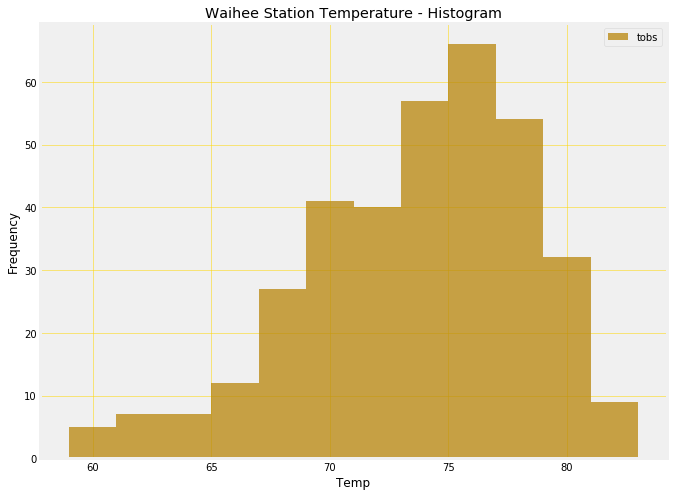

In [30]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

a = np.array(hist_df)
x = a[0:,0]

fig, ax = plt.subplots(figsize=(10, 8))

n, bins, patches = plt.hist(x, 12, facecolor='darkgoldenrod', alpha=0.75)

plt.title('Waihee Station Temperature - Histogram')
plt.ylabel('Frequency')
plt.xlabel('Temp')
plt.legend(['tobs'])

plt.grid(color='gold', linewidth=.5)
plt.show()

In [31]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [32]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


#Need to check these results as they differ from the instruction's solution **** !!!!

results = calc_temps('2011-02-28', '2011-03-05')
results

[(61.0, 69.75510204081633, 75.0)]

In [33]:
bar_df = pd.DataFrame(results, columns=['tmin','tavg','tmax'])

# Set Column names

#bar_df.dtypes

bar_df

,tmin,tavg,tmax
0,61.0,69.755102,75.0


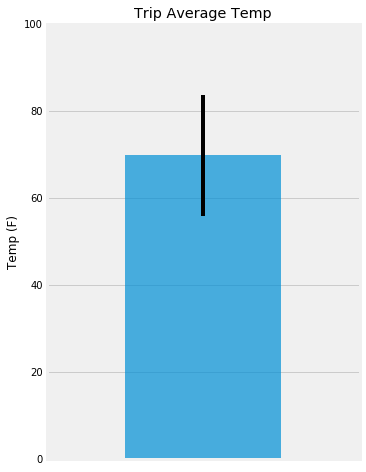

In [34]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

N = 1
mean = (bar_df['tavg'])
errbar = (bar_df['tmax']-bar_df['tmin'])
ind = np.arange(N)    # the x locations for the groups
width = 0.20      # the width of the bars: can also be len(x) sequence

mean.plot(kind='bar',yerr=errbar , alpha=0.7, figsize=(5,8))
#p1 = plt.bar(ind, mean, width, yerr=std)

plt.ylabel('Temp (F)')
plt.title('Trip Average Temp')
plt.xticks([])
plt.ylim(0,100)
#plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [35]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.


#Vacation dates (as per above): Start, End:'2012-02-28', '2012-03-05' -- one year prior, see below. 

start_date = '2011-02-28'
end_date = '2011-03-05'
mask = (df_merged['date'] > start_date) & (df_merged['date'] <= end_date)

vacay_filtered = df_merged.loc[mask]
vacay_filtered.head().reset_index()


,index,id_x,station,name,latitude,longitude,elevation,id_y,date,prcp,tobs
0,384,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,385,2011-03-01,0.10,68.0
1,385,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,386,2011-03-02,0.00,72.0
2,386,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,387,2011-03-03,0.00,74.0
3,387,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,388,2011-03-04,0.88,72.0
4,388,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,389,2011-03-05,0.40,69.0


In [36]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

station_groups_prcp = vacay_filtered.groupby(['station','name','latitude','longitude','elevation'])
prcp_totals = station_groups_prcp['prcp'].sum()
station_prcp_totals = prcp_totals.reset_index()

station_prcp_totals.sort_values(
    ["prcp"], ascending=False)

,station,name,latitude,longitude,elevation,prcp
5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,2.33
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,2.23
8,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,2.17
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,1.96
3,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,1.45
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,1.44
7,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,1.38
0,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,0.63
4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.00


In [37]:
#Converting merged DataFrame to Dictionary for Flask portion

df_merged.to_csv("Merged_ClimateData.csv", index=False, header=True)
climate_data = "Merged_ClimateData.csv"
climate_data_flask = pd.read_csv(climate_data)
climate_data_flask.head()


#climate_data_flask.set_index('date').to_dict(orient='index').values()

climate_DF_flask = pd.DataFrame(climate_data_flask)
climate_dict = climate_DF_flask.set_index('date').to_dict('list')
#climate_DF_flask.to_dict('dict')



## Optional Challenge Assignment

In [38]:
#--DB not yet completed as of 1/19/20

# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [39]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [40]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [41]:
# Plot the daily normals as an area plot with `stacked=False`
